# 0 Problem

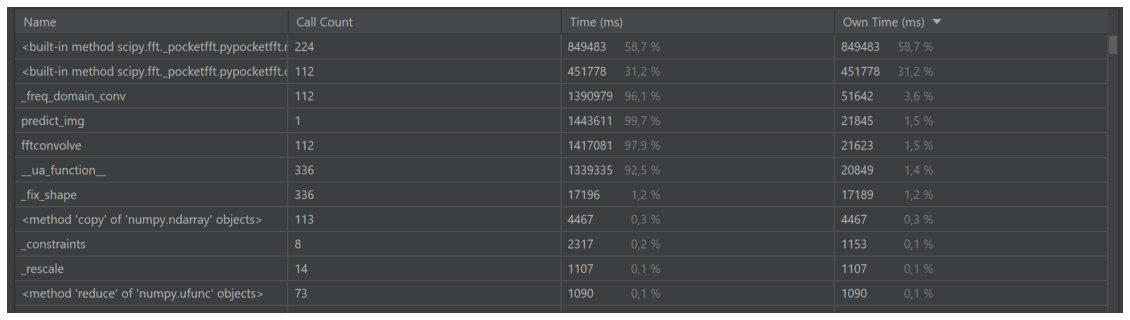

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('C:/Users/jo77pihe/Documents/MasterThesis_OfSpinesAndDendrites/Evaluation/profiling.png')
plt.figure(figsize=(20, 30))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

# 1 Use existing functions

In [21]:
!pip install line_profiler
!pip install cupy-cuda112

In [1]:
%load_ext line_profiler

In [1]:
from cupyx.profiler import benchmark
import numpy as np
from scipy.signal import fftconvolve, convolve
import cupy as cp
from cupyx.scipy import ndimage
import sys
sys.path.insert(1, 'C:/Users/jo77pihe/Documents/MasterThesis_OfSpinesAndDendrites')
# import deconv.utils.c_convolve as cc

In [2]:
a128 = np.random.rand(10,128,128).astype(np.float32)
b128 = np.random.rand(10,128,128).astype(np.float32)
a256 = np.random.rand(20,256,256).astype(np.float32)
b256 = np.random.rand(20,256,256).astype(np.float32)
a512_1 = np.random.rand(20,512,512).astype(np.float32)
b512_1 = np.random.rand(20,512,512).astype(np.float32)
a512_2 = np.random.rand(40,512,512).astype(np.float32)
b512_2 = np.random.rand(40,512,512).astype(np.float32)
a512_3 = np.random.rand(80,512,512).astype(np.float32)
b512_3 = np.random.rand(80,512,512).astype(np.float32)

## 1.0 Numpy
* Only supports 1D convolution

## 1.1: Scipy

In [3]:
def sci_conv(a, b, n = 1):
    for _ in range(n):
        a = convolve(a,b, mode='same', method='direct')
    return a


def sci_fftconv(a, b, n = 1):
    for _ in range(n):
        a = fftconvolve(a,b, mode='same')
    return a

In [4]:
con_res = np.zeros((5,12))
con_std = np.zeros((5,12))
n_rep = 3
n_conv = 5

In [ ]:
x = benchmark(sci_conv, (a128,b128,n_conv), n_repeat=n_rep)
con_res[0,0] = np.mean(x.cpu_times)
con_res[0,1] = np.mean(x.gpu_times)
con_std[0,0] = np.std(x.cpu_times)
con_std[0,1] = np.std(x.gpu_times)
x = benchmark(sci_conv, (a256,b256,n_conv), n_repeat=n_rep)
con_res[1,0] = np.mean(x.cpu_times)
con_res[1,1] = np.mean(x.gpu_times)
con_std[1,0] = np.std(x.cpu_times)
con_std[1,1] = np.std(x.gpu_times)
x = benchmark(sci_conv, (a512_1,b512_1,n_conv), n_repeat=n_rep)
con_res[2,0] = np.mean(x.cpu_times)
con_res[2,1] = np.mean(x.gpu_times)
con_std[2,0] = np.std(x.cpu_times)
con_std[2,1] = np.std(x.gpu_times)
x = benchmark(sci_conv, (a512_2,b512_2,n_conv), n_repeat=n_rep)
con_res[3,0] = np.mean(x.cpu_times)
con_res[3,1] = np.mean(x.gpu_times)
con_std[3,0] = np.std(x.cpu_times)
con_std[3,1] = np.std(x.gpu_times)
x = benchmark(sci_conv, (a512_3,b512_3,n_conv), n_repeat=n_rep)
con_res[4,0] = np.mean(x.cpu_times)
con_res[4,1] = np.mean(x.gpu_times)
con_std[4,0] = np.std(x.cpu_times)
con_std[4,1] = np.std(x.gpu_times)

np.save('con_mean.npy', con_res)
np.save('con_std.npy', con_std)

In [12]:
x = benchmark(sci_fftconv, (a128,b128,n_conv), n_repeat=n_rep)
con_res[0,2] = np.mean(x.cpu_times)
con_res[0,3] = np.mean(x.gpu_times)
con_std[0,2] = np.std(x.cpu_times)
con_std[0,3] = np.std(x.gpu_times)
x = benchmark(sci_fftconv, (a256,b256,n_conv), n_repeat=n_rep)
con_res[1,2] = np.mean(x.cpu_times)
con_res[1,3] = np.mean(x.gpu_times)
con_std[1,2] = np.std(x.cpu_times)
con_std[1,3] = np.std(x.gpu_times)
x = benchmark(sci_fftconv, (a512_1,b512_1,n_conv), n_repeat=n_rep)
con_res[2,2] = np.mean(x.cpu_times)
con_res[2,3] = np.mean(x.gpu_times)
con_std[2,2] = np.std(x.cpu_times)
con_std[2,3] = np.std(x.gpu_times)
x = benchmark(sci_fftconv, (a512_2,b512_2,n_conv), n_repeat=n_rep)
con_res[3,2] = np.mean(x.cpu_times)
con_res[3,3] = np.mean(x.gpu_times)
con_std[3,2] = np.std(x.cpu_times)
con_std[3,3] = np.std(x.gpu_times)
x = benchmark(sci_fftconv, (a512_3,b512_3,n_conv), n_repeat=n_rep)
con_res[4,2] = np.mean(x.cpu_times)
con_res[4,3] = np.mean(x.gpu_times)
con_std[4,2] = np.std(x.cpu_times)
con_std[4,3] = np.std(x.gpu_times)

np.save('con_mean.npy', con_res)
np.save('con_std.npy', con_std)

In [5]:
con_res = np.load('con_mean.npy')
con_std = np.load('con_std.npy')

## 1.2: Numba

* "Numba is designed to be used with NumPy arrays and functions" (https://numba.pydata.org/)
* "SciPy is already a high-performance library so in most cases I would expect numba to perform worse (or rarely: slightly better)" (https://stackoverflow.com/questions/55317665/numba-jit-with-scipy)

## 1.3: Numba-Scipy
* Convolution not among supported functions (https://numba-scipy.readthedocs.io/en/latest/reference/special.html)

In [ ]:
!pip install numba-scipy

## 1.4 Cupy

In [13]:
def cupy_conv(a,b, n=1):
    ac = cupy.array(a, dtype=cupy.float32)
    bc = cupy.array(b, dtype=cupy.float32)
    for _ in range(n):
        a = ndimage.convolve(ac, bc, mode='constant')
    return cupy.asnumpy(a)

In [14]:
n_rep = 3

x = benchmark(cupy_conv, (a128,b128,n_conv), n_repeat=n_rep)
con_res[0,4] = np.mean(x.cpu_times)
con_res[0,5] = np.mean(x.gpu_times)
con_std[0,4] = np.std(x.cpu_times)
con_std[0,5] = np.std(x.gpu_times)
x = benchmark(cupy_conv, (a256,b256,n_conv), n_repeat=n_rep)
con_res[1,4] = np.mean(x.cpu_times)
con_res[1,5] = np.mean(x.gpu_times)
con_std[1,4] = np.std(x.cpu_times)
con_std[1,5] = np.std(x.gpu_times)
x = benchmark(cupy_conv, (a512_1,b512_1,n_conv), n_repeat=n_rep)
con_res[2,4] = np.mean(x.cpu_times)
con_res[2,5] = np.mean(x.gpu_times)
con_std[2,4] = np.std(x.cpu_times)
con_std[2,5] = np.std(x.gpu_times)
# x = benchmark(cupy_conv, (a512_2,b512_2,n_conv), n_repeat=n_rep)
# con_res[3,4] = np.mean(x.cpu_times)
# con_res[3,5] = np.mean(x.gpu_times)
# con_std[3,4] = np.std(x.cpu_times)
# con_std[3,5] = np.std(x.gpu_times)
# x = benchmark(cupy_conv, (a512_3,b512_3,n_conv), n_repeat=n_rep)
# con_res[4,4] = np.mean(x.cpu_times)
# con_res[4,5] = np.mean(x.gpu_times)
# con_std[4,4] = np.std(x.cpu_times)
# con_std[4,5] = np.std(x.gpu_times)

np.save('con_mean.npy', con_res)
np.save('con_std.npy', con_std)

In [35]:
%lprun -f cupy_conv cupy_conv(a,b, 105)

In [24]:
print(con_res)

[[ 0.33202137  0.33222519  0.33134533  0.33157145  0.26123877  0.26811606
  22.76469317 22.76514714  0.          0.          0.          0.        ]
 [ 2.79992187  2.79761003  2.75057503  2.75087996 13.3446553  13.34491536
   0.          0.          0.          0.          0.          0.        ]
 [11.51872123 11.51952441 11.3475714  11.34796712  0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [24.15170603 24.15527799 23.94344823 23.94697917  0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [50.4263027  50.4318125  50.47167877 50.48951953  0.          0.
   0.          0.          0.          0.          0.          0.        ]]


In [4]:
def im2col_2d(mat, fil=3, res=1):
    '''
    Expects input and kernel to be square shape
    Returns : im2col view with shape - (ker_sz,ker_sz,img_sz,img_sz)
    '''
    # Parameters
    row_range = col_range = len(mat)-len(fil)+1
    ker_sz=len(fil)
    s0, s1 = mat.strides    
    shp = ker_sz,ker_sz,row_range,col_range
    strd = s0,s1,s0,s1

    out_view = cp.lib.stride_tricks.as_strided(mat, shape=shp, strides=strd)
    return out_view

In [14]:
hx= 512
dx = 10
n = 1
img = np.random.rand(hx,hx).astype(np.float32)

#Input filter
fil= np.random.rand(hx-1, hx-1).astype(np.float32)
print("Filter shape: {0}, Filter type: {1}".format(fil.shape,fil.dtype))

# Pad input if needed (value: 0, width: pad)
pad = (len(fil)-1)//2
img_pad = np.pad(img, pad, 'constant').astype(np.float32)

Filter shape: (511, 511), Filter type: float32


In [15]:

%%timeit
# Convert inputs using im2col in CPU
img_gpu=cp.asarray(img_pad)
fil_gpu=cp.asarray(fil)
col_mat=im2col_2d(img_gpu, fil_gpu,res=1) # im2col reshape

# Load inputs and allocate output memory in GPU
fil_GPU=fil_gpu.reshape(1,len(col_mat)*len(col_mat)) # (1,9)
mat_GPU=col_mat.reshape(len(col_mat)*len(col_mat),-1) # (9, 1048576)
out_GPU=cp.asarray(np.zeros((len(img),len(img)), dtype=np.float32)) # (1024,1024)

print("Output device : {0}, Data type: {1}, Shape: {2}".format(out_GPU.device, out_GPU.dtype, out_GPU.shape))



# Execute dot product on GPU and reshape output(col2im_2D)
out_GPU=cp.dot(fil_GPU,mat_GPU).reshape(hx,hx)
cp.cuda.Device().synchronize() # Do explicit synchronize to prevent asynchronous execution


OutOfMemoryError: Out of memory allocating 273,805,213,696 bytes (allocated so far: 2,207,158,272 bytes).

Timer unit: 1e-07 s

Total time: 24.0845 s
File: C:\Users\jo77pihe\AppData\Local\Temp/ipykernel_13704/3009679358.py
Function: cupy_conv at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def cupy_conv(a,b, n=1):
     2       106       1099.0     10.4      0.0      for _ in range(n):
     3       105     464168.0   4420.6      0.2          a = ndimage.convolve(cupy.array(a), cupy.array(b), mode='constant')
     4         1  240379695.0 240379695.0     99.8      return cupy.asnumpy(a)

## 1.5 PyTorch

In [19]:
import torch

In [20]:
def torch_conv(a,b, n=1):
    device = torch.device("cuda")
    torch.cuda.synchronize()
    with torch.no_grad():
        ac = torch.tensor(a[None, None, ...], dtype=torch.float32).pin_memory().to(device)
        bc = torch.torch.tensor(b[None,None,...], dtype=torch.float32).pin_memory().to(device)
        conv = torch.nn.Conv3d(1, 1, a.shape, stride=1, padding=(a.shape[0]//2,a.shape[1]//2,a.shape[2]//2), padding_mode='reflect',
                               bias=False, device=device, dtype=torch.float32)
        for _ in range(n):
            conv.weight = torch.nn.Parameter(bc)
            ac = conv(ac)
    # torch.cuda.synchronize()
    return (ac.detach().to(torch.device('cpu'))[0,0,:,:,:]).numpy()

In [ ]:
n_rep = 3

# x = benchmark(torch_conv, (a128,b128,n_conv), n_repeat=n_rep)
# con_res[0,6] = np.mean(x.cpu_times)
# con_res[0,7] = np.mean(x.gpu_times)
# con_std[0,6] = np.std(x.cpu_times)
# con_std[0,7] = np.std(x.gpu_times)
# x = benchmark(torch_conv, (a256,b256,n_conv), n_repeat=n_rep)
# con_res[1,6] = np.mean(x.cpu_times)
# con_res[1,7] = np.mean(x.gpu_times)
# con_std[1,6] = np.std(x.cpu_times)
# con_std[1,7] = np.std(x.gpu_times)
x = benchmark(torch_conv, (a512_1,b512_1,n_conv), n_repeat=n_rep)
con_res[2,6] = np.mean(x.cpu_times)
con_res[2,7] = np.mean(x.gpu_times)
con_std[2,6] = np.std(x.cpu_times)
con_std[2,7] = np.std(x.gpu_times)
# x = benchmark(torch_conv, (a512_2,b512_2,n_conv), n_repeat=n_rep)
# con_res[3,6] = np.mean(x.cpu_times)
# con_res[3,7] = np.mean(x.gpu_times)
# con_std[3,6] = np.std(x.cpu_times)
# con_std[3,7] = np.std(x.gpu_times)
# x = benchmark(torch_conv, (a512_3,b512_3,n_conv), n_repeat=n_rep)
# con_res[4,6] = np.mean(x.cpu_times)
# con_res[4,7] = np.mean(x.gpu_times)
# con_std[4,6] = np.std(x.cpu_times)
# con_std[4,7] = np.std(x.gpu_times)

np.save('con_mean.npy', con_res)
np.save('con_std.npy', con_std)

In [ ]:
%lprun -f torch_conv torch_conv(a,b, 105)

Timer unit: 1e-07 s

Total time: 3.72042 s
File: C:\Users\jo77pihe\AppData\Local\Temp/ipykernel_13704/1315201415.py
Function: torch_conv at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def torch_conv(a,b, n=1):
     2         1        183.0    183.0      0.0      device = torch.device("cuda")
     3         1       1378.0   1378.0      0.0      torch.cuda.synchronize()
     4         1        299.0    299.0      0.0      with torch.no_grad():
     5         1      10791.0  10791.0      0.0          ac = torch.tensor(a[None, None, ...], dtype=torch.float32).pin_memory().to(device)
     6         1       5711.0   5711.0      0.0          bc = torch.torch.tensor(b[None,None,...], dtype=torch.float32).pin_memory().to(device)
     7         2      11652.0   5826.0      0.0          conv = torch.nn.Conv3d(1, 1, a.shape, stride=1, padding=(a.shape[0]//2,a.shape[1]//2,a.shape[2]//2), padding_mode='reflect',
     8         1         29.0     29.0      0.0                                 bias=False, device=device, dtype=torch.float32)
     9         1        933.0    933.0      0.0          conv.weight = torch.nn.Parameter(bc)
    10         1       9835.0   9835.0      0.0          ac = conv(ac)
    11                                               # torch.cuda.synchronize()
    12         1   37163348.0 37163348.0     99.9      return (ac.detach().to(torch.device('cpu'))[0,0,:,:,:]).numpy()

# 2 Write own function and speed up

## 2.0 Cython 

In [60]:
def cython_conv(a,b, n = 1):
    for _ in range(n):
        a = cc.myconvolve(a,b)
    return a

In [ ]:
n_rep = 3

x = benchmark(cython_conv, (a128,b128,n_conv), n_repeat=n_rep)
con_res[0,8] = np.mean(x.cpu_times)
con_res[0,9] = np.mean(x.gpu_times)
con_std[0,8] = np.std(x.cpu_times)
con_std[0,9] = np.std(x.gpu_times)
# x = benchmark(cython_conv, (a256,b256,n_conv), n_repeat=n_rep)
# con_res[1,8] = np.mean(x.cpu_times)
# con_res[1,9] = np.mean(x.gpu_times)
# con_std[1,8] = np.std(x.cpu_times)
# con_std[1,9] = np.std(x.gpu_times)
# x = benchmark(cython_conv, (a512_1,b512_1,n_conv), n_repeat=n_rep)
# con_res[2,8] = np.mean(x.cpu_times)
# con_res[2,9] = np.mean(x.gpu_times)
# con_std[2,8] = np.std(x.cpu_times)
# con_std[2,9] = np.std(x.gpu_times)
# x = benchmark(cython_conv, (a512_2,b512_2,n_conv), n_repeat=n_rep)
# con_res[3,8] = np.mean(x.cpu_times)
# con_res[3,9] = np.mean(x.gpu_times)
# con_std[3,8] = np.std(x.cpu_times)
# con_std[3,9] = np.std(x.gpu_times)
# x = benchmark(cython_conv, (a512_3,b512_3,n_conv), n_repeat=n_rep)
# con_res[4,8] = np.mean(x.cpu_times)
# con_res[4,9] = np.mean(x.gpu_times)
# con_std[4,8] = np.std(x.cpu_times)
# con_std[4,9] = np.std(x.gpu_times)

np.save('con_mean.npy', con_res)
np.save('con_std.npy', con_std)

## 2.1 Numba

In [9]:
!pip install numba

  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.2
    Uninstalling numpy-1.21.2:
      Successfully uninstalled numpy-1.21.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\jo77pihe\\.conda\\envs\\ma\\envs\\tf_ma\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
from numba import njit, prange, jit
import numpy as np
import timeit
from scipy.signal import fftconvolve, convolve
import time
from numba import cuda, float32, guvectorize

In [3]:
@njit(parallel=True)
def num_c(a, b):
    (NAx, NAy, NAz) = a.shape
    (NBx, NBy, NBz) = a.shape
    Deg = NAz +NBz -1
    C = np.zeros((NAx, NBy, Deg))

    assert((NAx == NBx) and (NAy == NBy))

    for n in range(0, (Deg)):
        for m in range(0, n + 1):
            if ((n - m) < NAz and m < NBz):
                for i in range(0, NAx):
                    for j in range(0, NAy):
                        C[i, j, n] = C[i, j, n] + a[i, j, (n - m)] * b[i, j, m]
    return C

In [2]:
@njit(parallel=True)
def convolution_parallel(mat, fil, res, stride=1, rng=(10,128), kernel_sz=(3,3,3)):
    '''
    Performs convolution on a 2d square matrix.
    Expects a kernel with same height and width.
    '''
    for d in range(rng[0]):
        for row in range(rng[1]):
            for col in range(rng[1]):

                # Elementwise multiplication of input submat with kernel 
                submat = mat[d:d+kernel_sz[0],row:row+kernel_sz[1], col:col+kernel_sz[2]]
                # Sum up the values and add bias
                respix = np.sum(submat*fil)
                res[d,row, col] = respix
    return res

def numba_conv3d(a,b, n = 1):
    res = np.zeros(a.shape)
    px = a.shape[1]//2
    zx= a.shape[0]//2
    for _ in range(n):
        a = np.pad(a,((zx,zx),(px,px),(px,px)), mode='constant')
        res = convolution_parallel(a,b, res, rng =b.shape, kernel_sz=b.shape)
    return res

In [6]:
hx= 128
dx = 10
n = 1
a = np.random.rand(dx,hx,hx).astype(np.float32)
b = np.random.rand(dx,hx,hx).astype(np.float32)
bx = np.flip(b,(0,1,2))

# DO NOT REPORT THIS... COMPILATION TIME IS INCLUDED IN THE EXECUTION TIME!
start = time.time()
r=numba_conv3d(a,bx,1)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

# NOW THE FUNCTION IS COMPILED, RE-TIME IT EXECUTING FROM CACHE
start = time.time()
r=numba_conv3d(a,bx, 1)
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

end1 =  timeit.default_timer()
rs=sci_conv(a, b, 1)
end2 =  timeit.default_timer()
print(end2-end1)

print(np.allclose(rs,r))

Elapsed (with compilation) = 7.633013725280762
Elapsed (after compilation) = 7.65152645111084
0.11092619999999442
True


In [37]:
r.shape

(10, 128, 128)

In [2]:
@cuda.jit
def test_3d1o_nbcj_grid(x,k,y): #numba_conv
    n = cuda.grid(1)
    if (0 <= n) and (n < y.size):
        for i in range(k.shape[0]):
            for j in range(k.shape[1]):
                for l in range(k.shape[2]):
                    y[n] += x[i+n,j,l] * k[i,j,l]

In [3]:
hx= 256
dx = 30
n = 1
a = np.random.rand(dx,hx,hx).astype(np.float32)
b = np.random.rand(dx,hx,hx).astype(np.float32)
bx = np.flip(b,(0,1,2))
y = (np.zeros(bx.shape).astype(np.float32)).flatten()

a = np.ascontiguousarray(a, dtype=np.float32)
bx = np.ascontiguousarray(bx, dtype=np.float32)
y = np.ascontiguousarray(y, dtype=np.float32)

MASK_WIDTH = 3
MASK_RADIUS = MASK_WIDTH // 2
TILE_WIDTH = 8
W = TILE_WIDTH + MASK_WIDTH - 1




dimBlock = (TILE_WIDTH, TILE_WIDTH, TILE_WIDTH)
dimGrid = ((a.shape[0] + TILE_WIDTH - 1) // TILE_WIDTH, (a.shape[1] + TILE_WIDTH - 1) // TILE_WIDTH, (a.shape[2] + TILE_WIDTH - 1) // TILE_WIDTH)


# xc = cuda.to_device(a)
# kc = cuda.to_device(bx)

start = time.time()
r=test_3d1o_nbcj_grid[dimGrid, dimBlock](a,bx,y)
end = time.time()

LinkerError: [222] Call to cuLinkAddData results in UNKNOWN_CUDA_ERROR
ptxas application ptx input, line 9; fatal   : Unsupported .version 7.3; current version is '7.2'

In [2]:
#https://www.kaggle.com/alincijov/2d-3d-convolutions-using-numba-cuda
@cuda.jit
def conv3d(I, O, M, height, width, depth):
    s = cuda.shared.array(shape=(W, W, W), dtype=float32)

    dest = cuda.threadIdx.x + (cuda.threadIdx.y * TILE_WIDTH) + (cuda.threadIdx.z * TILE_WIDTH * TILE_WIDTH)
    destTmp = dest
    destX = destTmp % W
    destTmp = destTmp // W
    destY = destTmp % W
    destTmp = destTmp // W
    destZ = destTmp

    srcZ = destZ + (cuda.blockIdx.z * TILE_WIDTH) - MASK_RADIUS
    srcY = destY + (cuda.blockIdx.y * TILE_WIDTH) - MASK_RADIUS
    srcX = destX + (cuda.blockIdx.x * TILE_WIDTH) - MASK_RADIUS
    src = srcX, srcY, srcZ

    if(srcZ >= 0 and srcZ < depth and srcY >= 0 and srcY < height and srcX >= 0 and srcX < width):
        s[destZ][destY][destX] = I[src]
    else:
        s[destZ][destY][destX] = 0

    dest = cuda.threadIdx.x + (cuda.threadIdx.y * TILE_WIDTH) + (cuda.threadIdx.z * TILE_WIDTH * TILE_WIDTH) + TILE_WIDTH * TILE_WIDTH * TILE_WIDTH
    destTmp = dest
    destX = destTmp % W
    destTmp = destTmp // W
    destY = destTmp % W
    destTmp = destTmp // W
    destZ = destTmp

    srcZ = destZ + (cuda.blockIdx.z * TILE_WIDTH) - MASK_RADIUS
    srcY = destY + (cuda.blockIdx.y * TILE_WIDTH) - MASK_RADIUS
    srcX = destX + (cuda.blockIdx.x * TILE_WIDTH) - MASK_RADIUS
    src = srcX, srcY * width, srcZ * width * height

    if(destZ < W):
        if(srcZ >= 0 and srcZ < depth and srcY >= 0 and srcY < height and srcX >= 0 and srcX < width):
            s[destZ][destY][destX] = I[src]
        else:
            s[destZ][destY][destX] = 0

    cuda.syncthreads()

    sum = 0.

    for z in range(MASK_WIDTH):
        for y in range(MASK_WIDTH):
            for x in range(MASK_WIDTH):
                sum = sum + s[cuda.threadIdx.z + z][cuda.threadIdx.y + y][cuda.threadIdx.x + x] * M[x, y * MASK_WIDTH,  z * MASK_WIDTH * MASK_WIDTH]

    z = cuda.threadIdx.z + (cuda.blockIdx.z * TILE_WIDTH)
    y = cuda.threadIdx.y + (cuda.blockIdx.y * TILE_WIDTH)
    x = cuda.threadIdx.x + (cuda.blockIdx.x * TILE_WIDTH)

    if(z < depth and y < height and x < width):
        O[x, y, z] = sum

    cuda.syncthreads()

In [3]:
hx= 16
dx = 1
n = 1
img3d = np.random.rand(dx,hx,hx).astype(np.float32)
I = img3d
O = np.zeros((1,128,128))
M = np.random.randn(3,3,3)


MASK_WIDTH = 3
MASK_RADIUS = MASK_WIDTH // 2
TILE_WIDTH = 8
W = TILE_WIDTH + MASK_WIDTH - 1




dimBlock = (TILE_WIDTH, TILE_WIDTH, TILE_WIDTH)
dimGrid = ((I.shape[0] + TILE_WIDTH - 1) // TILE_WIDTH, (I.shape[1] + TILE_WIDTH - 1) // TILE_WIDTH, (I.shape[2] + TILE_WIDTH - 1) // TILE_WIDTH)

I = np.ascontiguousarray(I, dtype=np.float32)
O = np.ascontiguousarray(O, dtype=np.float32)

conv3d[dimGrid, dimBlock](I, O, M, 1, 128, 128)

C:\Users\jo77pihe\.conda\envs\ma_numba\lib\site-packages\numba\cuda\compiler.py:865: NumbaPerformanceWarning: Grid size (4) < 2 * SM count (164) will likely result in GPU under utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


LinkerError: [222] Call to cuLinkAddData results in UNKNOWN_CUDA_ERROR
ptxas application ptx input, line 9; fatal   : Unsupported .version 7.3; current version is '7.2'

### 2.1.1 Unroll matrix and filter

Unfeasible: Even for a 2D array of size 512x512 it results in a memory error

Source: https://github.com/anilsathyan7/ConvAcc/blob/master/conv_acc.ipynb

In [7]:
@njit
def im2col_2d(x, k):
    '''
    Expects input and kernel to be square shape
    Returns : im2col view with shape - (ker_sz,ker_sz,img_sz,img_sz)
    '''
    k_size= k.shape[0]
    row_range = col_range = x.shape[0]-k_size+1
    s0, s1 = x.strides    
    out_view = np.lib.stride_tricks.as_strided(x, shape=(ker_sz,ker_sz,row_range,col_range), strides=(s0,s1,s0,s1))
    return out_view

@guvectorize(['void(float32[:], float32[:,:], float32[:])'],'(n),(n,p)->(p)',target='parallel')
def matmulcore_cpu(A, B, C):
    n = len(A)
    n, p = B.shape
    for k in prange(n):
        for j in prange(p):
            C[j] += A[k] * B[k, j]

# Mesure execution time with timeit
def numpy_conv(img_pad, fil,res=1):
    col_mat=im2col_2d(img_pad, fil,res=1) # im2col reshape
    mul_mat=np.matmul(fil.reshape(1,len(col_mat)*len(col_mat)), col_mat.reshape(len(col_mat)*len(col_mat),-1)) # matrix multiplication
    results_numpy=mul_mat.reshape(len(img),len(img)) # col2im reshape



In [11]:
hx = 256
img = np.random.rand(hx,hx).astype(np.float32)

#Input filter
fil= np.random.rand(hx-1, hx-1).astype(np.float32)
print("Filter shape: {0}, Filter type: {1}".format(fil.shape,fil.dtype))

# Pad input if needed (value: 0, width: pad)
pad = (len(fil)-1)//2
img_pad = np.pad(img, pad, 'constant').astype(np.float32)

Filter shape: (255, 255), Filter type: float16


In [12]:
%timeit numpy_conv(img_pad, fil,res=1)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mnon-precise type pyobject[0m
[0m[1mDuring: typing of argument at C:\Users\jo77pihe\AppData\Local\Temp/ipykernel_16776/2176277713.py (8)[0m
[1m
File "..\..\..\AppData\Local\Temp\ipykernel_16776\2176277713.py", line 8:[0m
[1m<source missing, REPL/exec in use?>[0m 

This error may have been caused by the following argument(s):
- argument 0: Unsupported array dtype: float16
- argument 1: Unsupported array dtype: float16


In [10]:
%%timeit
C=np.zeros(len(img)*len(img), dtype=np.float32)
col_mat=im2col_2d(img_pad, fil,res=1) # im2col reshape
colres=matmulcore_cpu(fil.reshape(1,len(col_mat)*len(col_mat)), col_mat.reshape(len(col_mat)*len(col_mat),-1), C) # matrix multiplication
results_matmulcpu=colres.reshape(len(img),len(img)) # col2im reshape

9.48 s ± 105 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
def numba_conv(a,b, n = 1):
    for _ in range(n):
        a = num_c(a,b)
    return a

In [11]:
n_rep = 3
n_conv=5

%timeit x = numba_conv(a128,b128,n_conv)
con_res[0,10] = np.mean(x.cpu_times)
con_res[0,11] = np.mean(x.gpu_times)
con_std[0,10] = np.std(x.cpu_times)
con_std[0,11] = np.std(x.gpu_times)
# x = benchmark(numba_conv, (a256,b256,n_conv), n_repeat=n_rep)
# con_res[1,10] = np.mean(x.cpu_times)
# con_res[1,11] = np.mean(x.gpu_times)
# con_std[1,10] = np.std(x.cpu_times)
# con_std[1,11] = np.std(x.gpu_times)
# x = benchmark(numba_conv, (a512_1,b512_1,n_conv), n_repeat=n_rep)
# con_res[2,10] = np.mean(x.cpu_times)
# con_res[2,11] = np.mean(x.gpu_times)
# con_std[2,10] = np.std(x.cpu_times)
# con_std[2,11] = np.std(x.gpu_times)
# x = benchmark(numba_conv, (a512_2,b512_2,n_conv), n_repeat=n_rep)
# con_res[3,10] = np.mean(x.cpu_times)
# con_res[3,11] = np.mean(x.gpu_times)
# con_std[3,10] = np.std(x.cpu_times)
# con_std[3,11] = np.std(x.gpu_times)
# x = benchmark(numba_conv, (a512_3,b512_3,n_conv), n_repeat=n_rep)
# con_res[4,10] = np.mean(x.cpu_times)
# con_res[4,11] = np.mean(x.gpu_times)
# con_std[4,10] = np.std(x.cpu_times)
# con_std[4,11] = np.std(x.gpu_times)

KeyboardInterrupt: 

# 3 Show Results

In [10]:
c_res_sh = con_res[:,::2]

In [11]:
c_res_sh

array([[4.07552667e-01, 3.28806367e-01, 1.98494267e-01, 1.94772651e+01,
        0.00000000e+00, 0.00000000e+00],
       [2.90478777e+00, 2.82269513e+00, 1.12674888e+01, 1.04635041e+03,
        0.00000000e+00, 0.00000000e+00],
       [1.38426661e+01, 1.15340168e+01, 1.80697406e+02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.80235051e+01, 2.42278294e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [5.09859346e+01, 5.07136262e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [12]:
c_res_sh=np.ravel(c_res_sh)
c_res_sh[c_res_sh==0]= np.nan

In [13]:
labs = ['Scipy Conv', 'Scipy FFT', 'Cupy', 'PyTorch', 'Cython', 'Numba']
sizes =['10x128x128', '20x256x256', '20x512x512', '40x512x512', '80x512x512']

In [14]:
sizes = [item for item in sizes for i in range(len(labs))]
labsx = labs +labs
labsxx = labsx+labsx+labs

In [15]:
import pandas as pd

df = pd.DataFrame(sizes, columns=['Sizes'])

In [16]:
df['Method']=labsxx
df['Time'] = c_res_sh

In [17]:
df.head()

,Sizes,Method,Time
0,10x128x128,Scipy Conv,0.407553
1,10x128x128,Scipy FFT,0.328806
2,10x128x128,Cupy,0.198494
3,10x128x128,PyTorch,19.477265
4,10x128x128,Cython,NaN


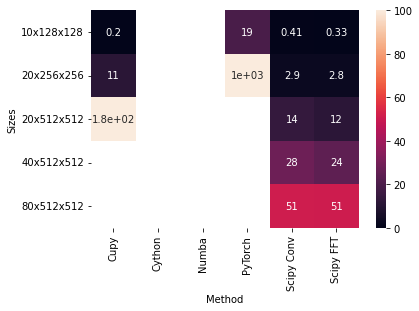

In [18]:
import seaborn as sns
p = df.pivot("Sizes", "Method", "Time")

ax = sns.heatmap(p, vmin=0, vmax=100, annot=True)

* Cython implementationthrows error when using too large arrays(np.random.rand(10,100,4)) on my machine
* np.random.rand(10,100,3) works --> then it is fast indeed
* Numba: not done yet. But sounded on the internet as if it is not as good at handling large arrays as numpy